In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

In [2]:
# # 加载 .npz 文件,其中是通过点击不同区域打好的标注数据
# data = np.load('training_data.npz')
# # 提取数据
# trn_x = data['trnx']
# trn_y= data['trny']
# # 加完整mask图像
# image = cv2.imread('../../data/imgs/0618.png')
# # 转换为RGB格式（opencv读取为BGR）
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# test_x = np.array(image_rgb).reshape(-1,3)


In [3]:
def loadImage(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # image = cv2.cvtColor(image,cv2.COLOR_RGB2LAB)
    return image

def process_image(image):
    data = image.reshape((-1,3))
    return data


In [4]:
def init_centroids(data,K):
    np.random.seed(42)
    indices = np.random.choice(len(data), K, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:,np.newaxis] - centroids,axis=2)
    clusterLabels = np.argmin(distances,axis=1)
    return clusterLabels

def update_centroids(data, clusterLabel, k):
    newCentroid = np.array([data[clusterLabel == i].mean(axis=0) for i in range(k)])
    return newCentroid

def isConverged(oldCentroids, centroids, tolerence = 1e-5):
    return np.linalg.norm(centroids - oldCentroids) < tolerence


In [5]:
def k_means(data, k, iter=100):

    start = time.time()

    centroids = init_centroids(data, k)
    for i in range(iter):
        labels = assign_clusters(data,centroids)
        newCentroids = update_centroids(data,labels,k)
        if isConverged(centroids,newCentroids):
            break
        centroids = newCentroids
        
        print("第", i+1,"次迭代","用时：{0}".format(time.time() - start))
    return labels, centroids

In [6]:
# 显示聚类后的彩色图像
def display_colored_clusters(image, labels, centroids):
    segmented_image = centroids[labels].reshape(image.shape).astype(np.uint8)
    plt.title("Colored Segmentation")
    plt.imshow(segmented_image)
    plt.axis("off")
    plt.show()


In [7]:
# 分离显示每个簇
def display_separated_clusters(image, labels, k):
    h, w, c = image.shape
    fig, axes = plt.subplots(1, k, figsize=(15, 5))
    for i in range(k):
        cluster_image = np.zeros_like(image)
        cluster_image = cluster_image.reshape(-1, 3)
        cluster_image[labels == i] = image.reshape(-1, 3)[labels == i]
        cluster_image = cluster_image.reshape(h, w, c)
        
        axes[i].imshow(cluster_image)
        axes[i].set_title(f"Cluster {i + 1}")
        axes[i].axis("off")
    plt.show()

In [8]:
image_path = '../../data/imgs/0618.png'
k = 2
image = loadImage(image_path)
data = process_image(image)
labels, centroids = k_means(data,k)


第 1 次迭代 用时：0.016263723373413086
第 2 次迭代 用时：0.020720243453979492
第 3 次迭代 用时：0.036386966705322266
第 4 次迭代 用时：0.03871941566467285
第 5 次迭代 用时：0.050864219665527344
第 6 次迭代 用时：0.06045341491699219


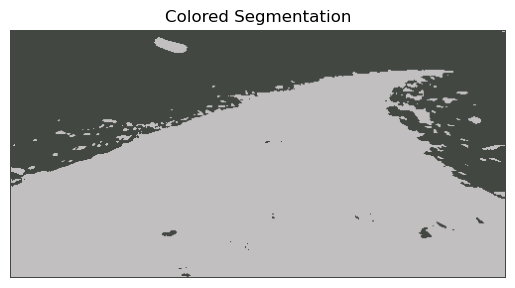

In [9]:
display_colored_clusters(image, labels, centroids)

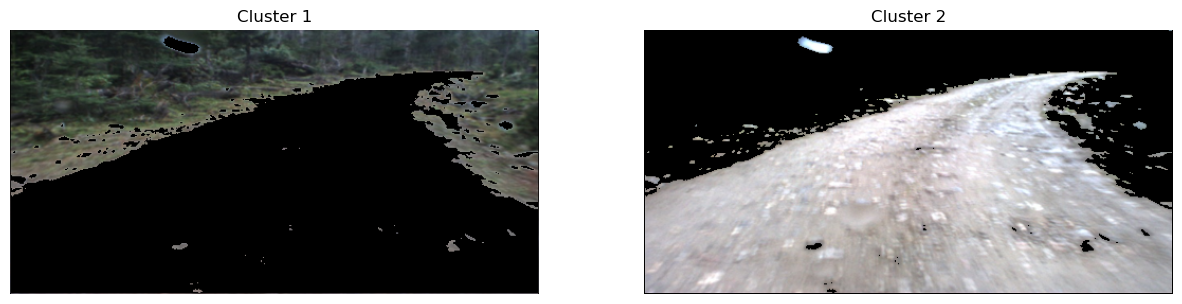

In [10]:
display_separated_clusters(image,labels,k)

In [11]:
# 可视化聚类结果在2D空间
def plot_clusters_2D(data, labels):
    # 使用PCA将数据降维到2D，以便可视化
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    # 绘制聚类结果
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title("2D Projection of Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

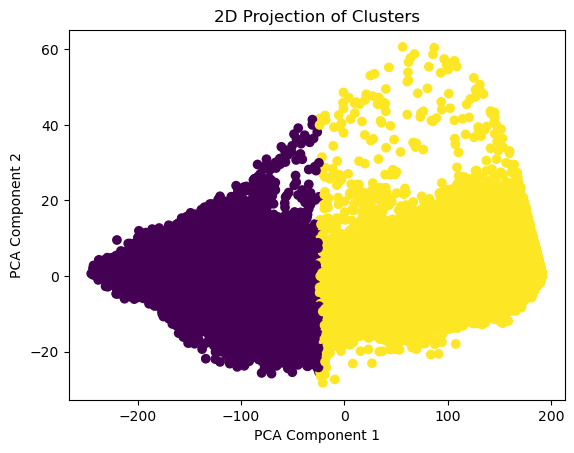

In [12]:
plot_clusters_2D(data,labels)